In [29]:
import json
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt

In [13]:
d = "followers"
filenames = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        filenames.append(full_path)

followers = pd.DataFrame()

for currFile in filenames:
    with open(currFile) as jsonFile:
        dictJson = json.load(jsonFile)
    followers = followers.append(pd.DataFrame.from_dict(dictJson['data']), ignore_index=True)

followers.to_csv('followers.csv')

In [22]:
followers['followed_at'] = pd.to_datetime(followers['followed_at'])

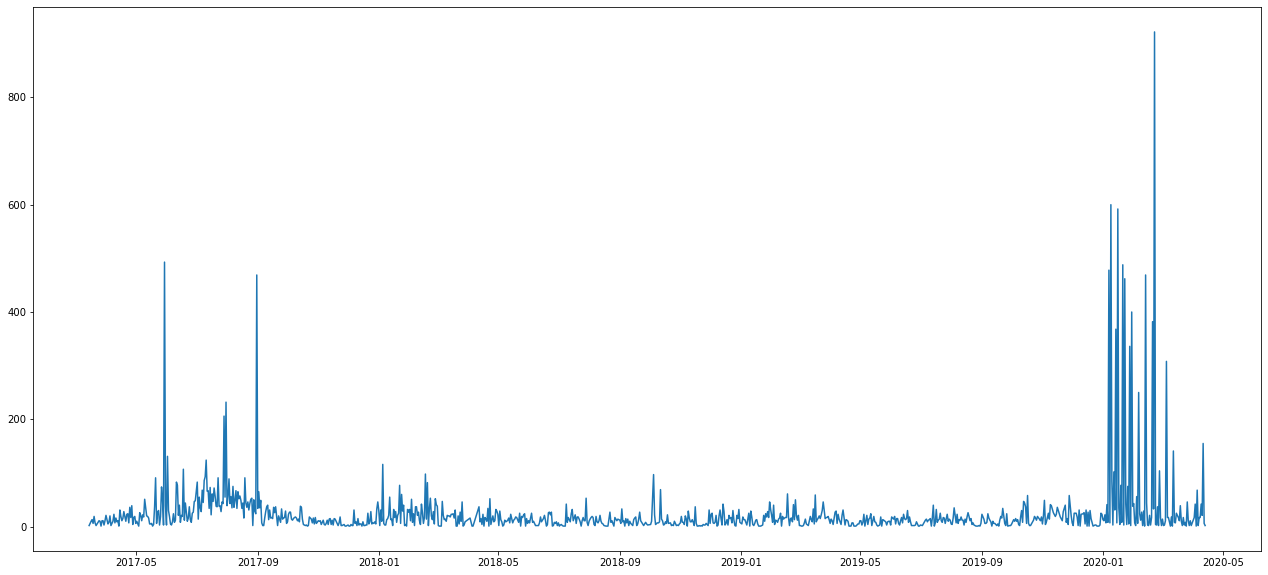

In [36]:
plt.figure(figsize=(22, 10))
plt.plot(followers.groupby(by=followers['followed_at'].dt.date).count().iloc[290:,1])
plt.show()